In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import time 

ticker = 'AAPL'
sub = yf.download(f"{ticker}",period="1m")['Close'][0]

df1 = pd.DataFrame(columns = ["Entry Price", "Exit Price", "Quantity", "Direction", "P&L", "Balance"])
df1.to_csv('order_history.csv')

def brownian_motion(df, u, sigma):  
    dt = 1/360
    new_price = df.loc[df.index[-1]][0]*(1+u*dt + sigma * np.random.normal(0, 1) * np.sqrt(dt))
    df.loc[df.index[-1]+1] = new_price

price_series = pd.DataFrame(sub,columns=['price'], index=[0])
for i in range(50):
    brownian_motion(price_series, 0.1, 0.1)
    price_series['Ema-5'] = price_series.price.ewm(span=5).mean()
    price_series['Ema-20'] = price_series.price.ewm(span=20).mean()
    
while True:
    brownian_motion(price_series, 0.1, 0.1)
    price_series['Ema-5'] = price_series.price.ewm(span=5).mean()
    price_series['Ema-20'] = price_series.price.ewm(span=20).mean()
    time.sleep(1)
    if len(price_series) > 50:
        price_series = price_series.iloc[-50:, :]
    price_series.to_csv('sub.csv')

[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

159.35484843898394 167.74194572524627 176.1290430115086


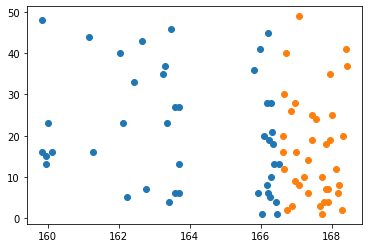

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(order_book_b.Price, order_book_b.Size)
plt.scatter(order_book_s.Price, order_book_s.Size)
print(i*0.95,i,i*1.05)